In [112]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from skimage import io,color,exposure,filters,morphology
import skimage.morphology as sm
from scipy.misc import imread
%matplotlib inline

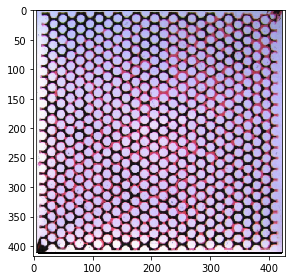

In [113]:
img=io.imread('C:/Users/Administrator/Desktop/a.png')
io.imshow(img)

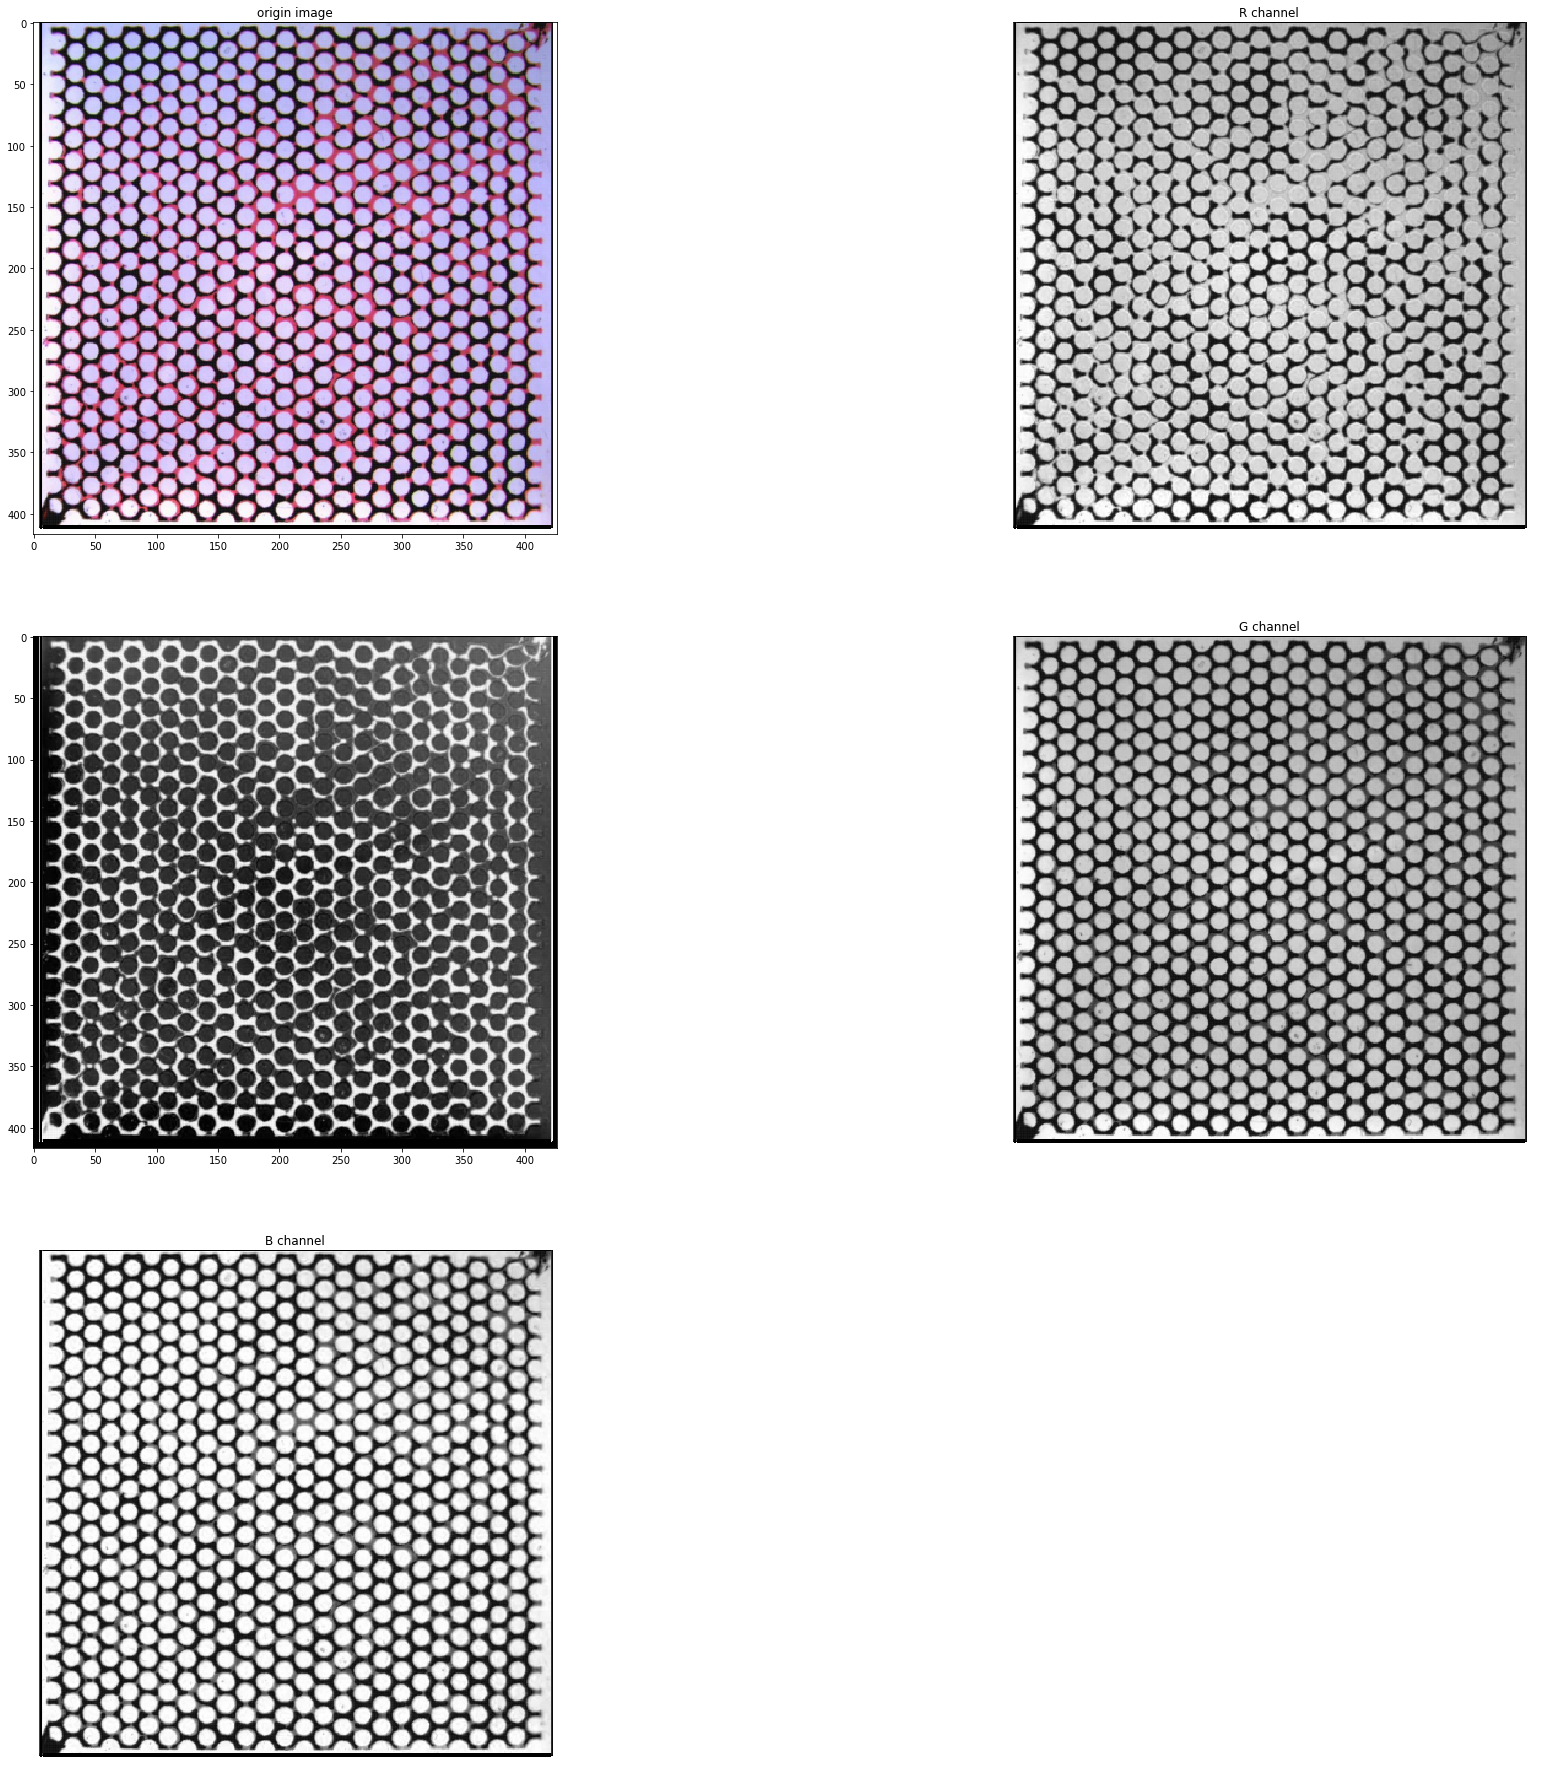

In [116]:
plt.figure(num='img',figsize=(32,32))  #创建一个名为astronaut的窗口,并设置大小
plt.subplot(3,2,1)     #将窗口分为两行两列四个子图，则可显示四幅图片
plt.title('origin image')   #第一幅图片标题
plt.imshow(img)      #绘制第一幅图片

plt.subplot(3,2,2)     #第二个子图
plt.title('R channel')   #第二幅图片标题
plt.imshow(img[:,:,0],plt.cm.gray)      #绘制第二幅图片,且为灰度图
plt.axis('off')     #不显示坐标尺寸
plt.subplot(3,2,3)
t=-img[:,:,0]
plt.imshow(t,plt.cm.gray)

plt.subplot(3,2,4)     #第三个子图
plt.title('G channel')   #第三幅图片标题
plt.imshow(img[:,:,1],plt.cm.gray)      #绘制第三幅图片,且为灰度图
plt.axis('off')     #不显示坐标尺寸

plt.subplot(3,2,5)     #第四个子图
plt.title('B channel')   #第四幅图片标题
plt.imshow(img[:,:,2],plt.cm.gray)      #绘制第四幅图片,且为灰度图
plt.axis('off')     #不显示坐标尺寸

plt.show()   #显示窗口

(-0.5, 426.5, 416.5, -0.5)

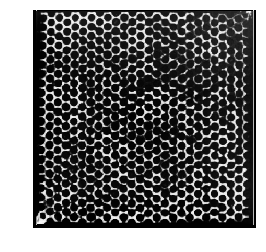

In [117]:
 

dstw=sm.white_tophat(t,sm.square(2)) 
dmbh=dstw-t
dstb=sm.black_tophat(t,sm.square(2))  
dmh=dstb-dmbh
gam2= exposure.adjust_gamma(dmh,2)

plt.imshow(gam2,plt.cm.gray)     
plt.axis('off') 


(-0.5, 426.5, 416.5, -0.5)

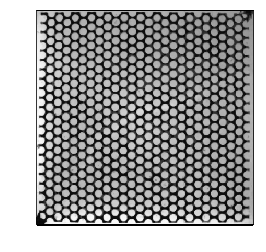

In [118]:

dstw1=sm.white_tophat(img[:,:,1],sm.square(2)) 
dmbh1=dstw1-img[:,:,1]
dstb1=sm.black_tophat(img[:,:,1],sm.square(2))  
dmh1=dstb1-dmbh1
gam1= exposure.adjust_gamma(dmh1,1.2)

plt.imshow(gam1,plt.cm.gray)     
plt.axis('off') 


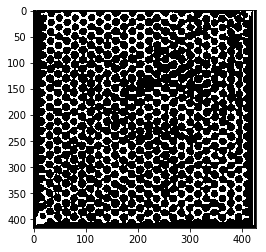

In [119]:
thresh = filters.threshold_otsu(gam2)   #返回一个阈值
dst =(gam2 >= thresh)*1.0 
plt.imshow(dst,plt.cm.gray)

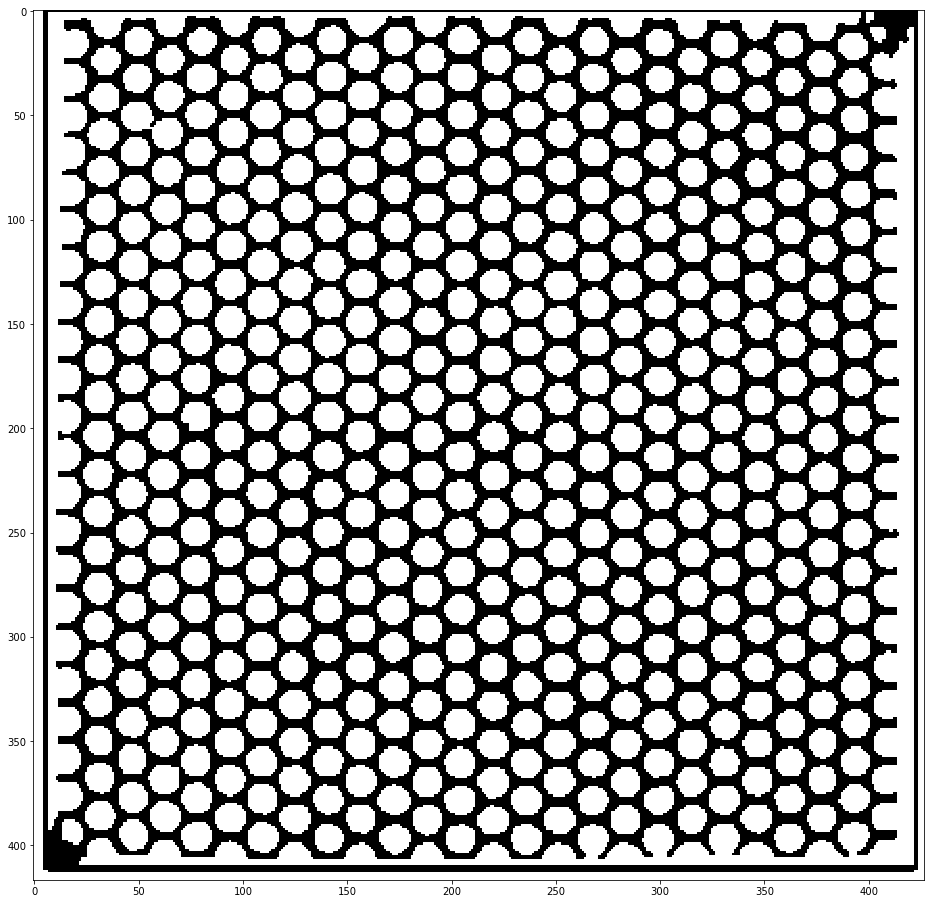

In [120]:
plt.figure(num='img',figsize=(16,16)) 
thresh1 = filters.threshold_otsu(gam1)   #返回一个阈值
dst1 =(gam1 >= thresh)*1.0 
plt.imshow(dst1,plt.cm.gray)

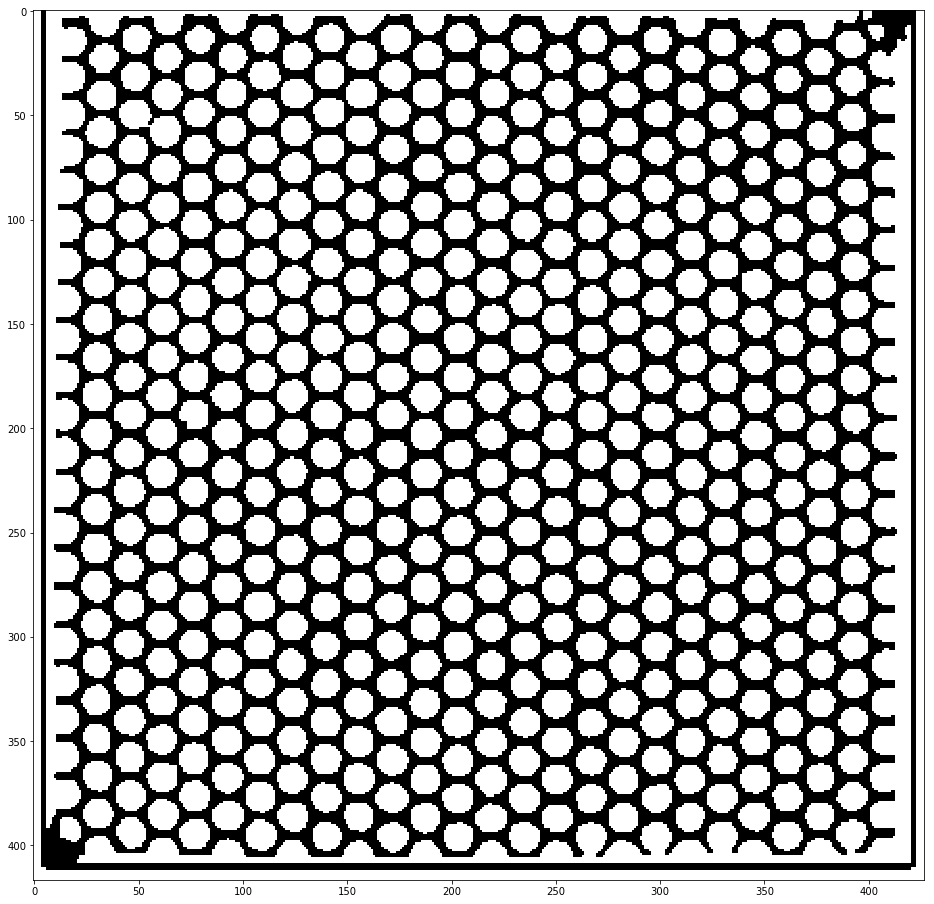

In [121]:
plt.figure(num='img',figsize=(16,16)) 
dst2=sm.dilation(dst1,sm.square(2))
dst3=sm.erosion(dst2,sm.square(2))
plt.imshow(dst3,plt.cm.gray)

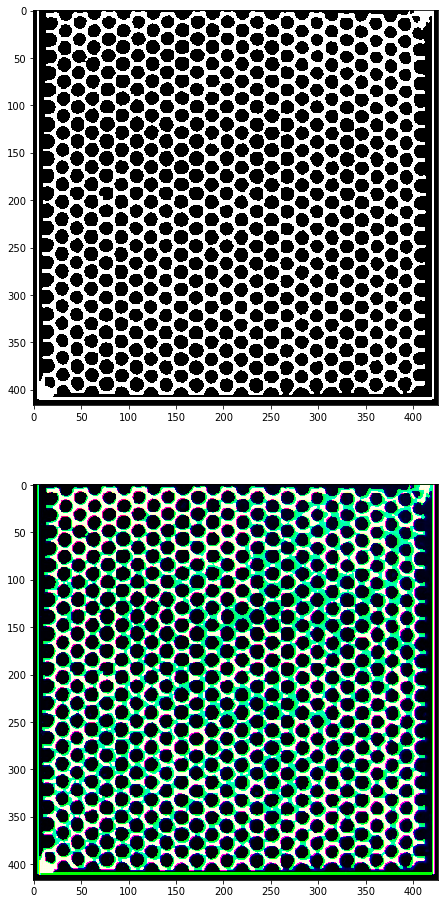

In [162]:
plt.figure(num='img',figsize=(16,16)) 
ys=1-dst3
plt.subplot(211)
plt.imshow(ys,plt.cm.gray)
mergedByNp = np.dstack([dst,ys,img[:,:,2]])
plt.subplot(212)
plt.imshow(mergedByNp)

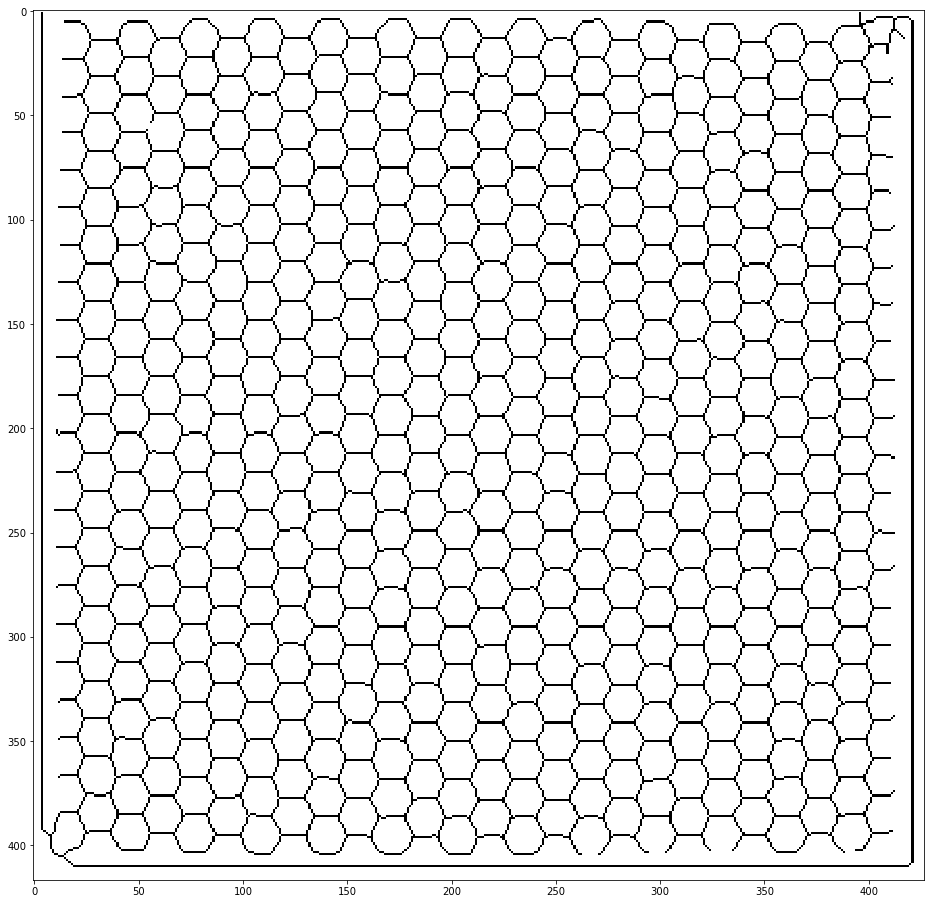

In [212]:
plt.figure(num='img',figsize=(16,16)) 
skeleton =morphology.skeletonize(ys)
sss=1-skeleton
plt.imshow(sss,plt.cm.gray)

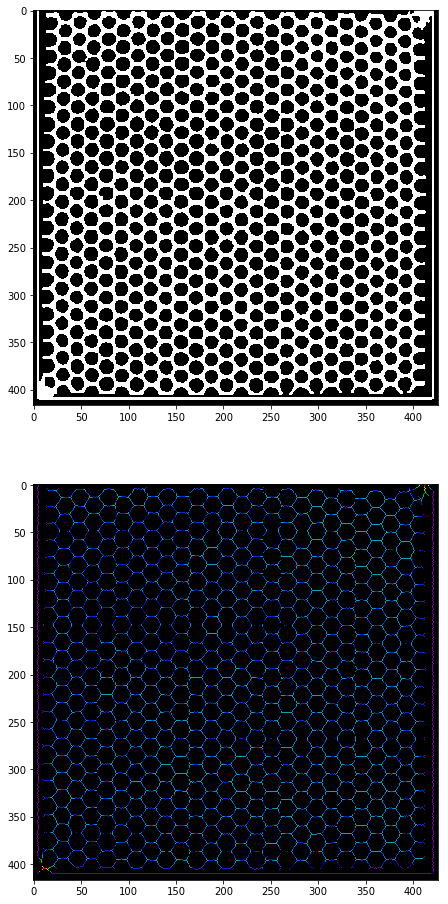

In [213]:
plt.figure(num='img',figsize=(16,16)) 
skel, distance =morphology.medial_axis(ys, return_distance=True)
dist_on_skel = distance * skel
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 16))
ax1.imshow(ys, cmap=plt.cm.gray, interpolation='nearest')
ax2.imshow(dist_on_skel, cmap=plt.cm.spectral, interpolation='nearest')


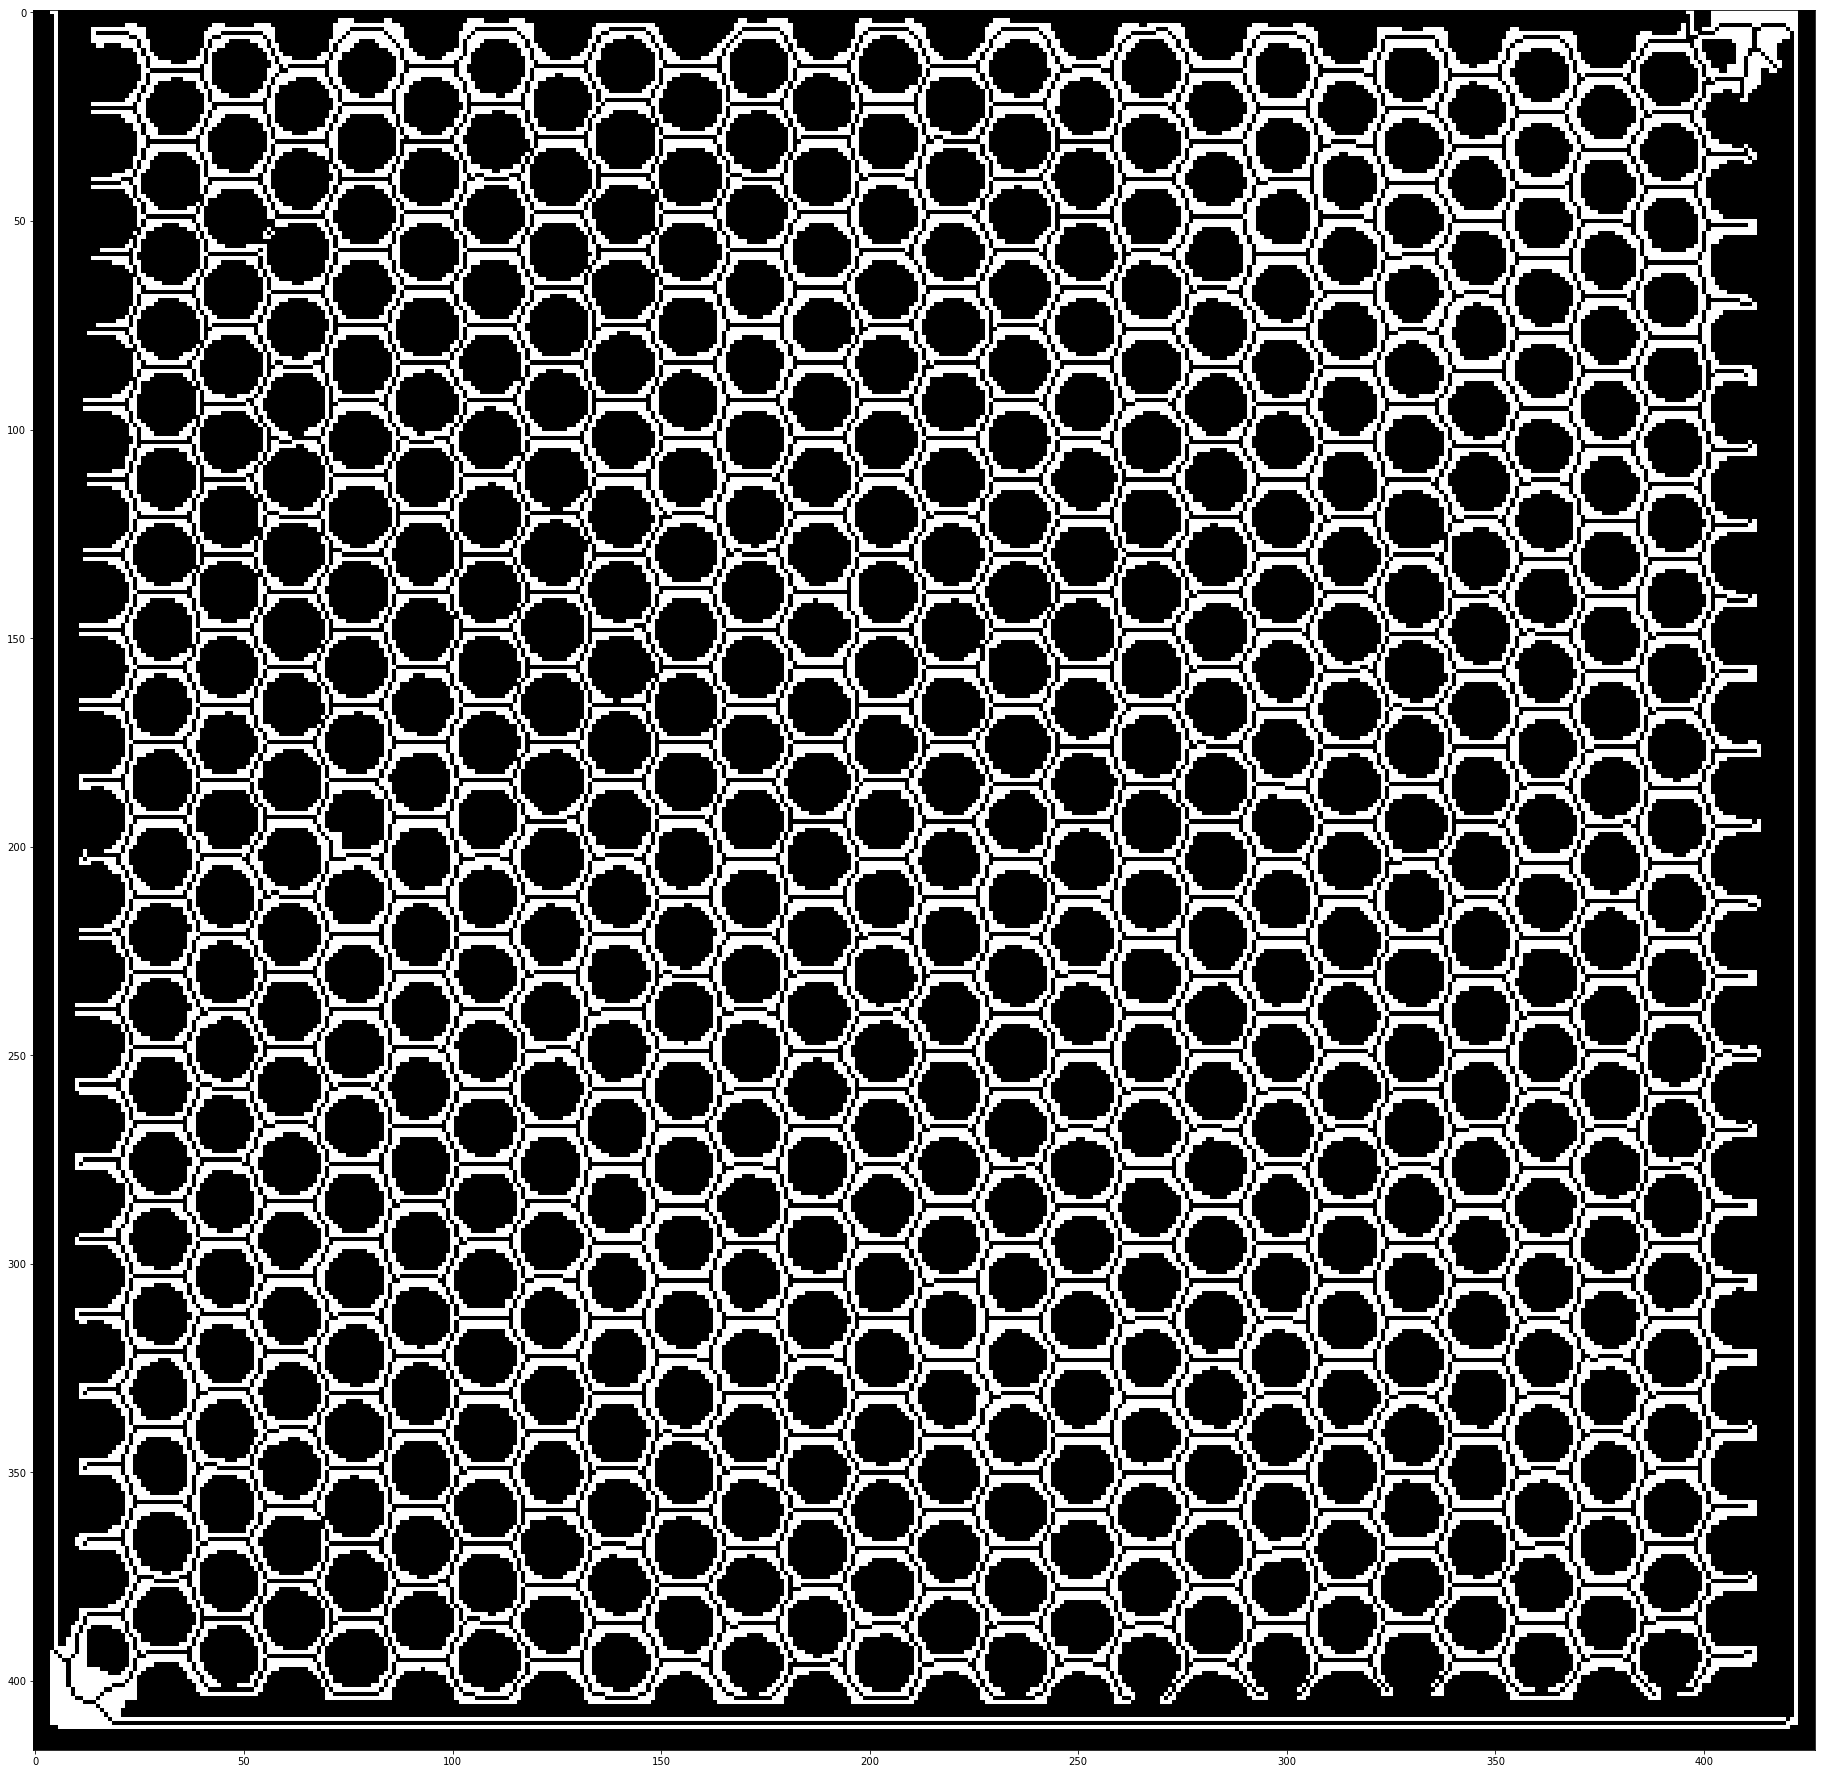

In [214]:
plt.figure(num='img',figsize=(32,32)) 
y=sss+ys
plt.imshow(y,'gray')

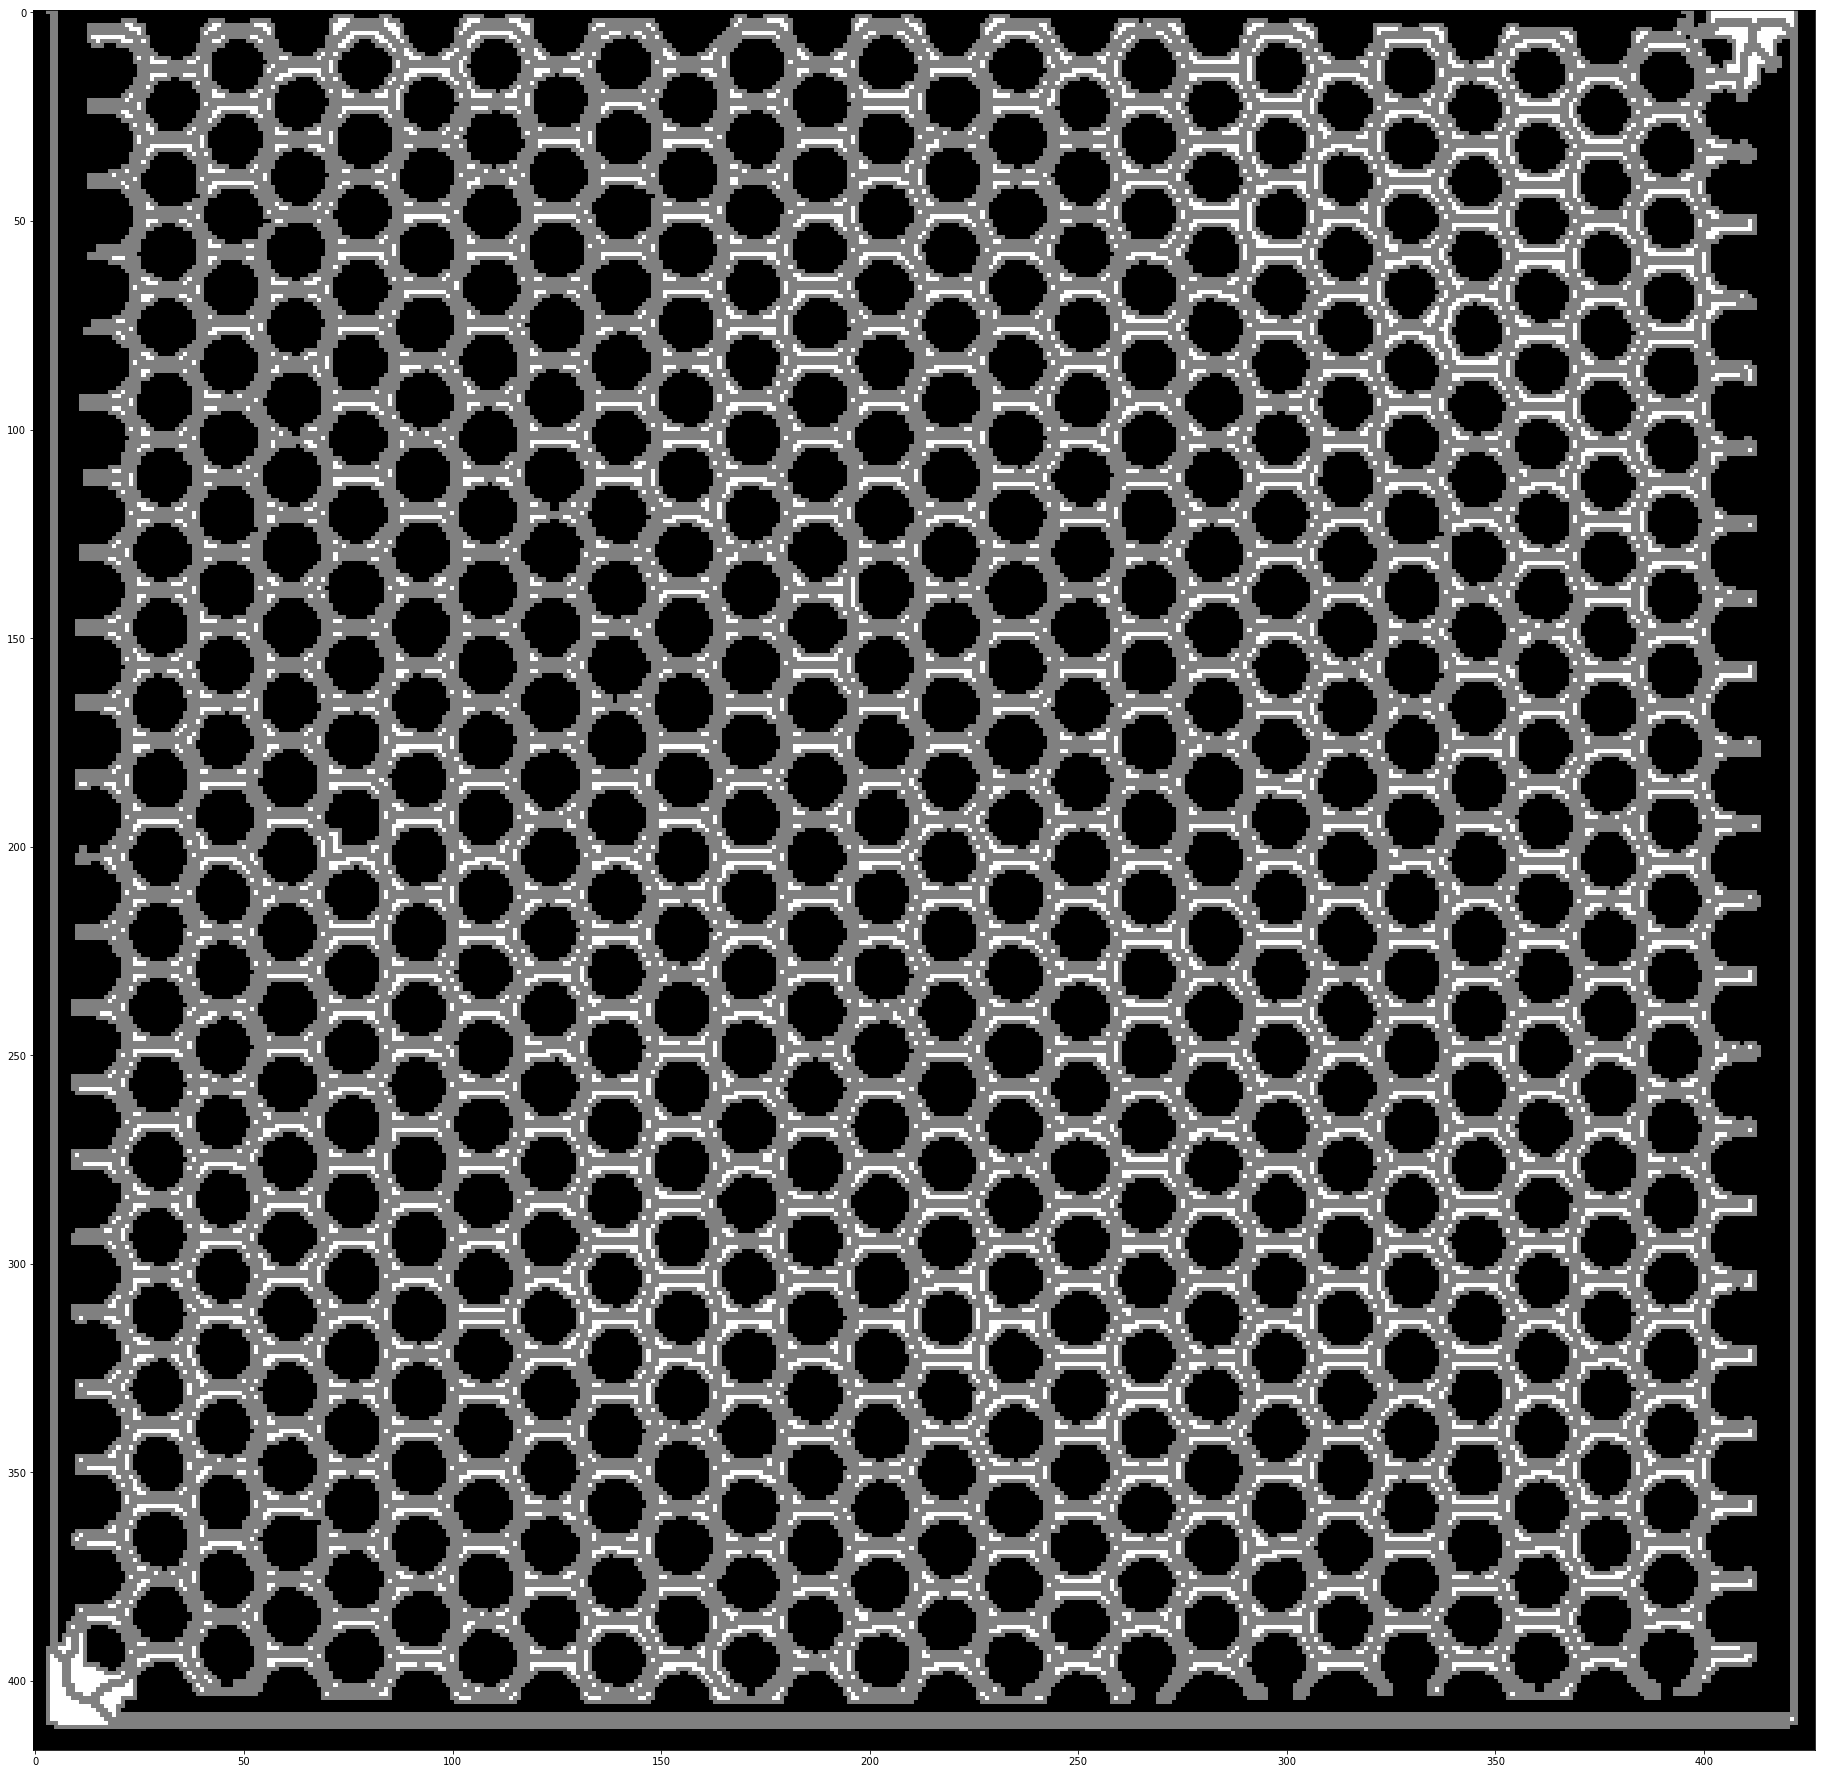

In [215]:
plt.figure(num='img',figsize=(32,32))
b1=sm.erosion(y,sm.square(2))
b2=sm.erosion(1-y,sm.square(2))
j=b1-b2     #击中击不中变换
j1=abs(b1-b2)
plt.imshow(j,'gray')
#plt.imshow(j1,'gray')